In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
df = pd.read_csv("players_22.csv")
df

/var/folders/fh/69wht55n6blgsr9q298tx8p80000gn/T/ipykernel_47296/3992235073.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("players_22.csv")


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,...,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,...,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,...,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,...,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(50)
memory usage: 16.1+ MB


In [4]:
# creating dataframe having only numeric values
df_con = df.select_dtypes([np.number])
df_con

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,158023,93,93,78000000.0,320000.0,34,170,72,73.0,1.0,...,96,20,35,24,6,11,15,14,8,NaN
1,188545,92,92,119500000.0,270000.0,32,185,81,21.0,1.0,...,88,35,42,19,15,6,12,8,10,NaN
2,20801,91,91,45000000.0,270000.0,36,187,83,11.0,1.0,...,95,24,32,24,7,11,15,14,11,NaN
3,190871,91,91,129000000.0,270000.0,29,175,68,73.0,1.0,...,93,35,32,29,9,9,15,15,11,NaN
4,192985,91,91,125500000.0,350000.0,30,181,70,10.0,1.0,...,89,68,65,53,15,13,5,10,13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,47,52,70000.0,1000.0,22,180,64,112541.0,1.0,...,37,38,43,48,6,10,5,15,13,NaN
19235,262040,47,59,110000.0,500.0,19,175,70,445.0,1.0,...,47,37,44,47,11,12,6,8,10,NaN
19236,262760,47,55,100000.0,500.0,21,178,72,111131.0,1.0,...,36,38,44,48,8,6,7,10,6,NaN
19237,262820,47,60,110000.0,500.0,19,173,66,111131.0,1.0,...,47,10,14,11,7,10,7,14,15,NaN


In [5]:
df.info('nation_team_id')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 110 columns):
 #    Column                       Dtype  
---   ------                       -----  
 0    sofifa_id                    int64  
 1    player_url                   object 
 2    short_name                   object 
 3    long_name                    object 
 4    player_positions             object 
 5    overall                      int64  
 6    potential                    int64  
 7    value_eur                    float64
 8    wage_eur                     float64
 9    age                          int64  
 10   dob                          object 
 11   height_cm                    int64  
 12   weight_kg                    int64  
 13   club_team_id                 float64
 14   club_name                    object 
 15   league_name                  object 
 16   league_level                 float64
 17   club_position                object 
 18   club_jersey_number      

In [6]:
# removing unwanted attributes
df_con.drop(['sofifa_id','club_contract_valid_until','nation_team_id','nation_jersey_number','release_clause_eur',
             'value_eur','wage_eur','club_jersey_number','club_team_id','club_jersey_number','nationality_id','league_level',
             'international_reputation', 'club_jersey_number'],axis=1, inplace=True)

In [7]:
# dropping attribute will full NaN values

df_con.drop(['mentality_composure'],axis=1, inplace=True)

In [8]:
df_con.isnull().sum()

overall                            0
potential                          0
age                                0
height_cm                          0
weight_kg                          0
weak_foot                          0
skill_moves                        0
pace                            2132
shooting                        2132
passing                         2132
dribbling                       2132
defending                       2132
physic                          2132
attacking_crossing                 0
attacking_finishing                0
attacking_heading_accuracy         0
attacking_short_passing            0
attacking_volleys                  0
skill_dribbling                    0
skill_curve                        0
skill_fk_accuracy                  0
skill_long_passing                 0
skill_ball_control                 0
movement_acceleration              0
movement_sprint_speed              0
movement_agility                   0
movement_reactions                 0
m

In [9]:
# handling missing data

df_con.fillna(df.mean(),inplace=True) 

/var/folders/fh/69wht55n6blgsr9q298tx8p80000gn/T/ipykernel_47296/3290642612.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_con.fillna(df.mean(),inplace=True)


In [10]:
# looking at categorical variables which may be important

df.select_dtypes(exclude=['float64','int64'])

,player_url,short_name,long_name,player_positions,dob,club_name,league_name,club_position,club_loaned_from,club_joined,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",1987-06-24,Paris Saint-Germain,French Ligue 1,RW,NaN,2021-08-10,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,1988-08-21,FC Bayern München,German 1. Bundesliga,ST,NaN,2014-07-01,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",1985-02-05,Manchester United,English Premier League,ST,NaN,2021-08-27,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",1992-02-05,Paris Saint-Germain,French Ligue 1,LW,NaN,2017-08-03,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",1991-06-28,Manchester City,English Premier League,RCM,NaN,2015-08-30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,1999-01-02,Wuhan FC,Chinese Super League,SUB,NaN,2021-04-01,...,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19235,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,2002-03-18,Derry City,Rep. Ireland Airtricity League,RES,NaN,2021-02-22,...,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,2000-02-07,Finn Harps,Rep. Ireland Airtricity League,RES,NaN,2021-06-18,...,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,2002-04-23,Finn Harps,Rep. Ireland Airtricity League,RES,NaN,2021-06-18,...,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png


In [11]:
# encoding relevent categorical attributes

work_rates = {'Low/Low':0,'Medium/Low':1,'Low/Medium':1,'Medium/Medium':2,'High/Low':2,'Low/High':2,'High/Medium':3,'Medium/High':3,'High/High':3}
df['work_rate'] = df['work_rate'].map(work_rates)

preferd_foot = {'Left':0,'Right':1}
df['preferred_foot'] = df['preferred_foot'].map(preferd_foot)

body_types = {'Normal (170-)':0,'Normal (185+)':0,'Normal (170-185)':0,'Lean (170-)':1,'Lean (185+)':1,'Lean (170-185)':1,'Stocky (170-)':3,'Stocky (185+)':3,'Stocky (170-185)':3}
df['body_type'] = df['body_type'].map(body_types) 

In [12]:
# Creating a dataframe with the encoded categorical variable 

df_ctg = df[['work_rate','preferred_foot','body_type']].copy()

In [13]:
# Checking if dataframe with selected catagorical data has any null values

df_ctg.isnull().sum()

work_rate           0
preferred_foot      0
body_type         136
dtype: int64

In [14]:
df_ctg['body_type'].fillna(df_ctg['body_type'].median(),inplace=True)

In [15]:
df_ctg.isnull().sum()

work_rate         0
preferred_foot    0
body_type         0
dtype: int64

In [16]:
# join dataframes -
df_all = pd.concat([df_ctg,df_con],axis=1)

In [17]:
df_all.head()

,work_rate,preferred_foot,body_type,overall,potential,age,height_cm,weight_kg,weak_foot,skill_moves,...,mentality_penalties,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,1,0,0.0,93,93,34,170,72,4,4,...,75,20,35,24,6,11,15,14,8,36.439962
1,3,1,0.0,92,92,32,185,81,4,4,...,90,35,42,19,15,6,12,8,10,36.439962
2,2,1,0.0,91,91,36,187,83,4,5,...,88,24,32,24,7,11,15,14,11,36.439962
3,3,1,0.0,91,91,29,175,68,5,5,...,93,35,32,29,9,9,15,15,11,36.439962
4,3,1,0.0,91,91,30,181,70,5,4,...,83,68,65,53,15,13,5,10,13,36.439962


In [18]:
# printing all columns in the final processed dataset
print(df_all.columns)

Index(['work_rate', 'preferred_foot', 'body_type', 'overall', 'potential',
       'age', 'height_cm', 'weight_kg', 'weak_foot', 'skill_moves', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'defending_marking_awareness', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking

In [19]:
#(S.D = 1, mean = 0) in order to scale down values

from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(df_all)
df_scaled=scaler.transform(df_all)
df_scaled

array([[-2.16713880e+00, -1.79289091e+00, -6.59140843e-01, ...,
        -1.30677649e-01, -4.74817630e-01, -3.97144093e-15],
       [ 1.23461401e+00,  5.57758418e-01, -6.59140843e-01, ...,
        -4.82391230e-01, -3.62988130e-01, -3.97144093e-15],
       [-4.66262392e-01,  5.57758418e-01, -6.59140843e-01, ...,
        -1.30677649e-01, -3.07073380e-01, -3.97144093e-15],
       ...,
       [-4.66262392e-01,  5.57758418e-01,  6.70544664e-01, ...,
        -3.65153370e-01, -5.86647130e-01, -3.97144093e-15],
       [-4.66262392e-01,  5.57758418e-01,  6.70544664e-01, ...,
        -1.30677649e-01, -8.34143792e-02, -3.97144093e-15],
       [-4.66262392e-01,  5.57758418e-01,  6.70544664e-01, ...,
        -4.23772300e-01, -1.39329129e-01, -3.97144093e-15]])

In [20]:
# carrying out PCA with (no.of pc = no.of attributes)

from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df_scaled)
pca_all = pca.transform(df_scaled)
pca_all.shape

(19239, 50)

In [21]:
# looking at variance of top 5 principal components
pca_var = pca.explained_variance_ratio_
print("1st PC explained variance: ",np.cumsum(pca_var*100)[0])
print("2nd PC explained variance: ",np.cumsum(pca_var*100)[1])
print("3rd PC explained variance: ",np.cumsum(pca_var*100)[2])
print("4th PC explained variance: ",np.cumsum(pca_var*100)[3])
print("5th PC explained variance: ",np.cumsum(pca_var*100)[4])
print("10th PC explained variance: ",np.cumsum(pca_var*100)[9])

1st PC explained variance:  41.33332884883526
2nd PC explained variance:  55.957852303411066
3rd PC explained variance:  66.5840788960725
4th PC explained variance:  72.32547456444571
5th PC explained variance:  76.19118615204464
10th PC explained variance:  86.87948602371131


In [22]:
px.area(x=range(1,pca_var.shape[0]+1),y=pca_var,labels={'X: no. of Components','Y: Explained_variance'})

In [23]:
#pca = PCA(n_components=3)
##pca.fit(df_scaled)
#pca_3 = pca.transform(df_scaled)
#pca_3.shape

In [24]:
pca = PCA(n_components=4)
pca.fit(df_scaled)
pca_4 = pca.transform(df_scaled)
pca_4.shape

(19239, 4)

In [25]:
#pca
pca_4

array([[-10.25257815,  -5.98378258,   5.74813509,  -0.88671741],
       [ -9.17516241,  -2.63310155,   6.9201069 ,   1.94140492],
       [ -9.380187  ,  -4.1973863 ,   6.77046529,   2.1666826 ],
       ...,
       [  2.65289812,   0.14843144,  -4.5850039 ,   0.9877607 ],
       [  3.43468451,  -3.8147406 ,  -5.95713481,   1.44413364],
       [  2.07998926,  -1.36938095,  -5.37020964,  -0.85610751]])

In [27]:
# running k-means algo in a loop of 10
w = []
for i in range(1,11):
  kmm = KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmm.fit(pca_4)
  w.append(kmm.inertia_)

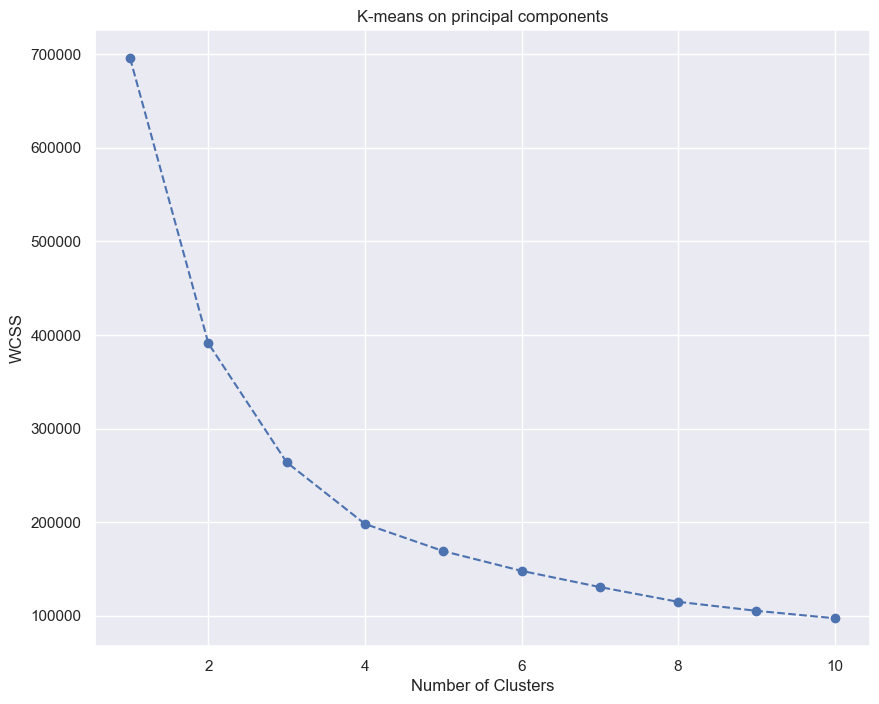

In [28]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11),w,marker='o',linestyle='--')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("K-means on principal components")
plt.show()

In [29]:
kmm = KMeans(n_clusters=4,init='k-means++',random_state=42)
kmm.fit(pca_4)

KMeans(n_clusters=4, random_state=42)

In [30]:
df_all = pd.merge(df_all,df["short_name"],left_index=True, right_index=True)

# merging original dataset with principal components 
df_seg = pd.concat([df_all.reset_index(drop=True),pd.DataFrame(pca_4)],axis=1)
df_seg.columns.values[-4:] = ['cp1','cp2','cp3','cp4']
df_seg['K-means segments'] = kmm.labels_
df_seg['segment'] = df_seg['K-means segments'].map({0:'Player type 1',1:'Player type 2',2:'Player type 3',3:'Player type 4'})

In [31]:
df_seg

,work_rate,preferred_foot,body_type,overall,potential,age,height_cm,weight_kg,weak_foot,skill_moves,...,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,short_name,cp1,cp2,cp3,cp4,K-means segments,segment
0,1,0,0.0,93,93,34,170,72,4,4,...,14,8,36.439962,L. Messi,-10.252578,-5.983783,5.748135,-0.886717,3,Player type 4
1,3,1,0.0,92,92,32,185,81,4,4,...,8,10,36.439962,R. Lewandowski,-9.175162,-2.633102,6.920107,1.941405,3,Player type 4
2,2,1,0.0,91,91,36,187,83,4,5,...,14,11,36.439962,Cristiano Ronaldo,-9.380187,-4.197386,6.770465,2.166683,3,Player type 4
3,3,1,0.0,91,91,29,175,68,5,5,...,15,11,36.439962,Neymar Jr,-10.109091,-5.770868,4.617410,-1.593072,3,Player type 4
4,3,1,0.0,91,91,30,181,70,5,4,...,10,13,36.439962,K. De Bruyne,-10.308952,-1.829960,6.723090,-1.609685,3,Player type 4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,2,1,1.0,47,52,22,180,64,3,2,...,15,13,36.439962,Song Defu,2.831039,0.247393,-4.737083,0.401338,1,Player type 2
19235,2,1,1.0,47,59,19,175,70,3,2,...,8,10,36.439962,C. Porter,2.110906,-0.371075,-4.585569,0.225334,2,Player type 3
19236,2,1,1.0,47,55,21,178,72,3,2,...,10,6,36.439962,N. Logue,2.652898,0.148431,-4.585004,0.987761,1,Player type 2
19237,2,1,1.0,47,60,19,173,66,3,2,...,14,15,36.439962,L. Rudden,3.434685,-3.814741,-5.957135,1.444134,2,Player type 3


In [32]:
from mpl_toolkits import mplot3d
import plotly.express as px
x_axis = df_seg['cp1']
y_axis = df_seg['cp2']
z_axis = df_seg['cp3']
#w_axis = df_seg['cp4']
fig = px.scatter_3d(df_seg,x_axis,y_axis,z_axis,color ='segment')
fig.show()

In [33]:
# List of type1 players 守門員
#df_grp = df_seg.groupby('K-means segments')
df_grp = df_seg.groupby('K-means segments')['short_name']

grp_1 = df_grp.get_group(0)
print("Type 1 players are listed as follows:")
grp_1 

Type 1 players are listed as follows:


5                 J. Oblak
7                 M. Neuer
8            M. ter Stegen
12             T. Courtois
18                 Ederson
               ...        
19210            Gao Xiang
19216    H. Wiles-Richards
19225          D. Da Silva
19227            A. Shaikh
19231                R. By
Name: short_name, Length: 2132, dtype: object

In [34]:
#中場偏組織(CB、CM)
grp_2 = df_grp.get_group(1)
print("Type 2 players are listed as follows:")
grp_2

Type 2 players are listed as follows:


56       K. Koulibaly
68        M. Škriniar
115          S. Savić
120            Felipe
130        J. Giménez
             ...     
19224       Hu Xingyu
19226         N. Dias
19230       N. Saliba
19234       Song Defu
19236        N. Logue
Name: short_name, Length: 5704, dtype: object

In [35]:
#後衛(LM RM CAM相關 足球好複雜)
grp_3 = df_grp.get_group(2)
print("Type 3 players are listed as follows:")
grp_3

Type 3 players are listed as follows:


1097                   Pepê
1452              Bryan Gil
1610             G. Caprari
1617             S. Bahoken
1715          Álvaro García
                ...        
19232            M. O'Brien
19233          R. Gallagher
19235             C. Porter
19237             L. Rudden
19238    E. Lalchhanchhuaha
Name: short_name, Length: 5266, dtype: object

In [36]:
#前鋒
grp_4 = df_grp.get_group(3)
print("Type 4 players are listed as follows:")
grp_4

Type 4 players are listed as follows:


0                 L. Messi
1           R. Lewandowski
2        Cristiano Ronaldo
3                Neymar Jr
4             K. De Bruyne
               ...        
14841           Y. Velasco
14842            R. Flores
14872           D. Ventúra
14879        Paulo Estrela
15277           E. Osadebe
Name: short_name, Length: 6137, dtype: object